In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from Network import RKMNetwork
import networkx as nx
from scipy.interpolate import make_smoothing_spline
import ast
import matplotlib
from matplotlib import cm

lam=20

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
def setup(df):
    df.Vtest = [ast.literal_eval(x) for x in df.Vtest]
    df.Vrecon = [ast.literal_eval(x) for x in df.Vrecon]
#     df.Davals[1:] = [ast.literal_eval(x) for x in df.Davals[1:]]
#     df.Ravals_forward[1:] = [ast.literal_eval(x) for x in df.Ravals_forward[1:]]
#     df.Ravals_back[1:] = [ast.literal_eval(x) for x in df.Ravals_back[1:]]

    MSEs = []

    for trainingstep in df.trainingstep:
        row = df[df.trainingstep == trainingstep].iloc[0]


        Vtest = np.array(row.Vtest).T
        Vrecon = np.array(row.Vrecon).T
        MSE = np.mean(np.linalg.norm(Vtest-Vrecon, axis=0))
        MSEs.append(MSE)

    df['MSE'] = MSEs

def plot_recon(df, step):
    row = df[df.trainingstep == step].iloc[0]


    Vtest = np.array(row.Vtest).T
    Vrecon = np.array(row.Vrecon).T
    
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,3))
    ax1.imshow(Vtest, cmap='binary')
    ax2.imshow(Vrecon, cmap='binary')
    
    ax1.set_xticks([])
    ax2.set_xticks([])

    ax1.set_ylabel(r'$V_i$')
    ax2.set_ylabel(r'$V_i$')

    ax1.set_title("Test data")

    ax2.set_title("Reconstructed data")
    fig.text(0,0.9,"Epoch = {}".format(row.epoch))
    fig.tight_layout()
    return fig
    
def plot_training(df):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,8), sharex=True)

    Bnorm = matplotlib.colors.Normalize(vmin=-1, vmax=2)
    Wnorm = matplotlib.colors.Normalize(vmin=-2, vmax=4)
    wi = 0
    for c in df.columns:
        if c[:2] == "BV":
            i = int(c[2])
            color = cm.Greens(Bnorm(i),bytes=True)
            color = np.array(color)/255.
            label = ""
            if i == 1:
                label = "Visible Bias"
            ax1.plot(df.trainingstep, df[c], label = label, color = color)
        if c[:2] == "BH":
            i = int(c[2])
            color = cm.Blues(Bnorm(i),bytes=True)
            color = np.array(color)/255.
            label = ""
            if i == 1:
                label = "Hidden Bias"
            ax1.plot(df.trainingstep, df[c], label = label, color = color)
        if c[0] == "W":
            label = ""
            if wi == 2:
                label = "Weights"
            color = cm.Reds(Wnorm(wi),bytes=True)
            color = np.array(color)/255.
            ax1.plot(df.trainingstep, df[c], label = label, color = color)
            wi+=1
    ax1.legend(fontsize=10, loc='lower right')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel(r'$k_{ij}$')
    
    ax2.scatter(df.trainingstep, df.MSE, alpha=.1)
    spl = make_smoothing_spline(df.trainingstep, df.MSE, lam=lam)
    ax2.plot(df.trainingstep, spl(df.trainingstep), '-.', c='k')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MSE')
#     ax2.set_xticks([0, 200, 400])
#     ax2.set_xticklabels([0, 100, 200])
    fig.tight_layout()
    return fig

# def plot_zigzag(df, xlim = [100, 200]):
    
#     Rnodes = df.Rnodevals.to_numpy()
#     Rnodes = np.array([np.array(ast.literal_eval(x)) for x in Rnodes[1:]])

#     Dnodes = df.Dnodevals.to_numpy()
#     Dnodes = np.array([np.array(ast.literal_eval(x)) for x in Dnodes[1:]])



#     fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

#     ax1.plot(df.epoch, df.L1k, label = 'L-V1')
#     ax1.plot(df.epoch, df.L2k, label = 'L-V2')
#     ax1.plot(df.epoch, df.M1k, label = 'V1-H1')
#     ax1.plot(df.epoch, df.M2k, label = 'V2-H1')
#     ax1.plot(df.epoch, df.R1k, label = 'H1-R')
# #     ax1.legend(fontsize=12)
#     ax2.set_xlabel('Epoch')
#     ax1.set_ylabel(r'$k_i$')

# #     ax2.plot(df.epoch[1:],Rnodes[:,1])
# #     ax2.plot(df.epoch[1:],Rnodes[:,2])
#     ax2.plot(df.epoch[1:],Rnodes[:,3])
#     ax2.set_ylabel("R state Hbar")

#     ax1.set_xlim(*xlim)
#     fig.tight_layout()
#     return fig

In [40]:
# 02 is good
df = pd.read_csv('data/trainings/test2x2_011426/train02.csv')
setup(df)
# df

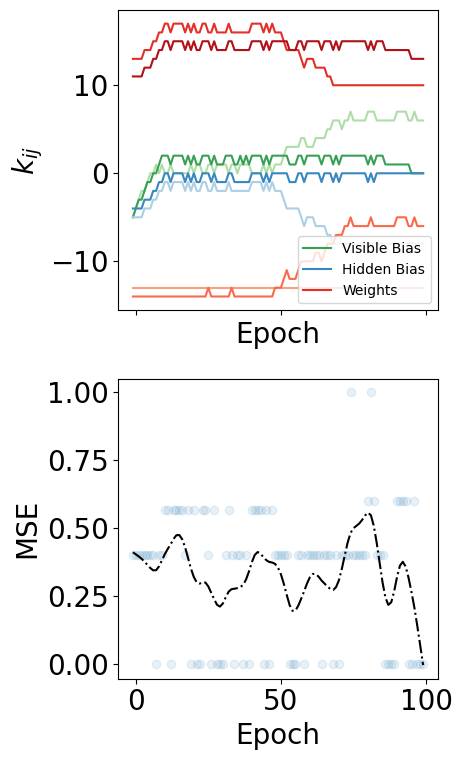

In [41]:
fig = plot_training(df)

Text(0, 0.9, 'Epoch = 49')

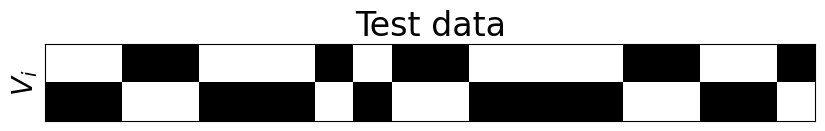

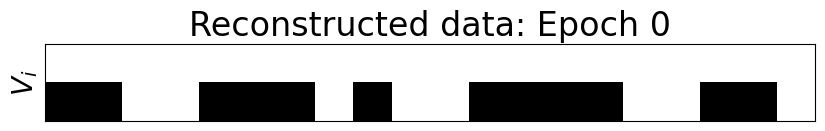

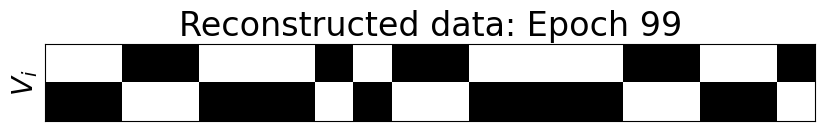

In [42]:
step = 0

last = df.iloc[-1].trainingstep

row = df[df.trainingstep == step].iloc[0]


Vtest = np.array(row.Vtest).T
Vrecon0 = np.array(row.Vrecon).T

step2 = last

row = df[df.trainingstep == step2].iloc[0]


Vrecon2 = np.array(row.Vrecon).T

# fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(10,3))
fig1, ax1 = plt.subplots(figsize=(10,1))
fig2, ax2 = plt.subplots(figsize=(10,1))
fig3, ax3 = plt.subplots(figsize=(10,1))

ax1.imshow(Vtest, cmap='binary')
ax2.imshow(Vrecon0, cmap='binary')
ax3.imshow(Vrecon2, cmap='binary')

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])

ax1.set_ylabel(r'$V_i$')
ax2.set_ylabel(r'$V_i$')
ax3.set_ylabel(r'$V_i$')

ax1.set_title("Test data")

ax2.set_title("Reconstructed data: Epoch 0")
ax3.set_title("Reconstructed data: Epoch {}".format(step2))
fig.text(0,0.9,"Epoch = {}".format(row.epoch))
# fig1.tight_layout()
# fig2.tight_layout()
# fig3.tight_layout()

# fig1.savefig('figures/test_data_0728.png')
# fig2.savefig('figures/recon_data_0_0728.png')
# fig3.savefig('figures/recon_data_198_0728.png')

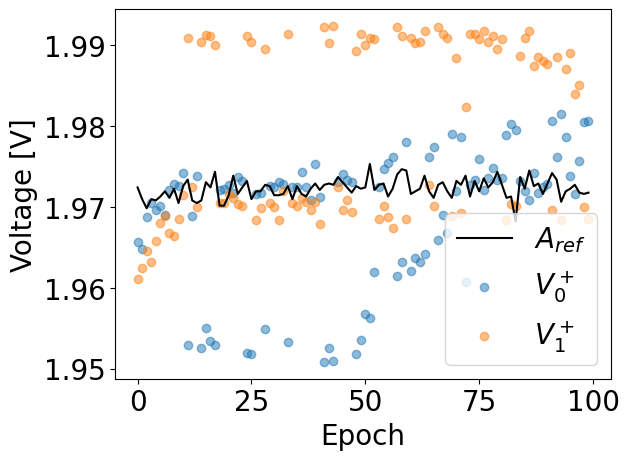

In [43]:
plt.plot(df.trainingstep, df.analogZero, c='k', zorder=5, label=r'$A_{ref}$')
plt.scatter(df.trainingstep, df.aV0, alpha=0.5, label=r'$V_0^+$')
plt.scatter(df.trainingstep, df.aV1, alpha=0.5, label=r'$V_1^+$')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Voltage [V]')
plt.show()

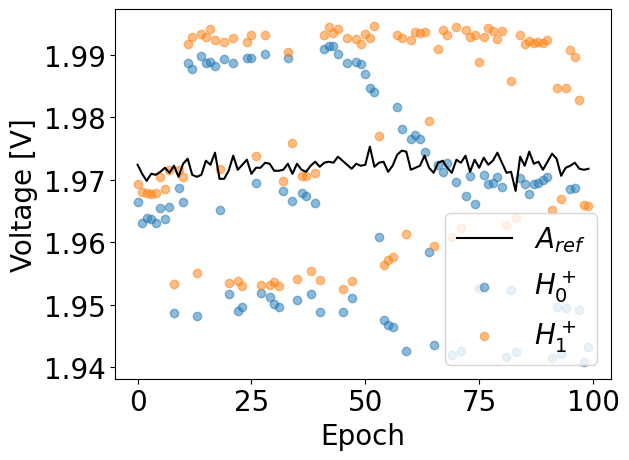

In [45]:
plt.plot(df.trainingstep, df.analogZero, c='k', zorder=5, label=r'$A_{ref}$')
plt.scatter(df.trainingstep, df.aH0, alpha=0.5, label=r'$H_0^+$')
plt.scatter(df.trainingstep, df.aH1, alpha=0.5, label=r'$H_1^+$')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Voltage [V]')
plt.show()

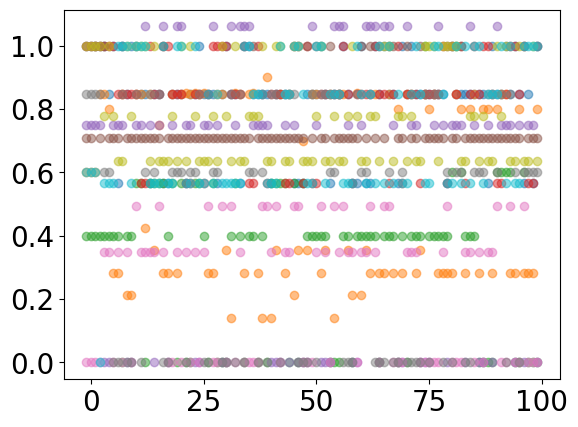

In [142]:
for i in range(10):
    df = pd.read_csv('data/trainings/test2x2_011426/train0{}.csv'.format(i))
    setup(df)
    
    MSE0 = []
    MSE1 = []
    for i, row in df.iterrows():
        Vrecon = np.array(row.Vrecon)
        Vtest = np.array(row.Vtest)
        MSE0.append(np.mean(np.abs(Vrecon[:,0] - Vtest[:,0])))
        MSE1.append(np.mean(np.abs(Vrecon[:,1] - Vtest[:,1])))
        
        
    df['MSE0'] = MSE0
    df['MSE1'] = MSE1
    
#     plt.plot(df.trainingstep, MSE0, c='b')
#     plt.plot(df.trainingstep, MSE1, c='r')
#     plt.show()
#     bf()
    
#     plot_recon(df, 0)
    
    plt.scatter(df.trainingstep, df.MSE, label=i, alpha=0.5)
    
#     spl = make_smoothing_spline(df.trainingstep, df.MSE, lam=lam)
#     plt.plot(df.trainingstep, spl(df.trainingstep))

0
1
2
3
4
5
6
7
8
9


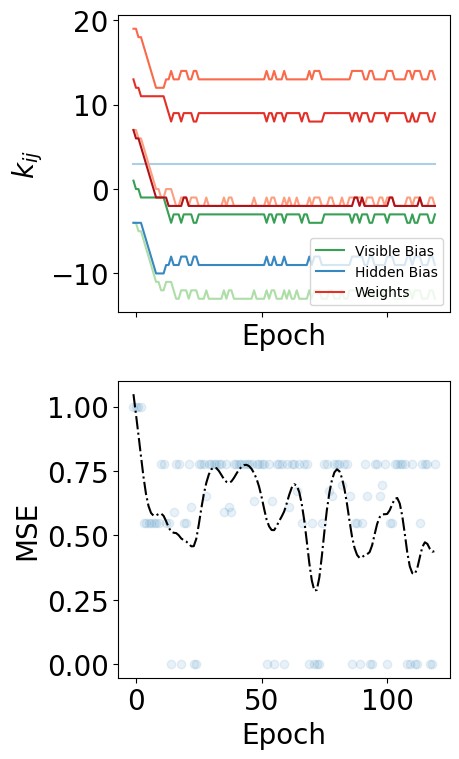

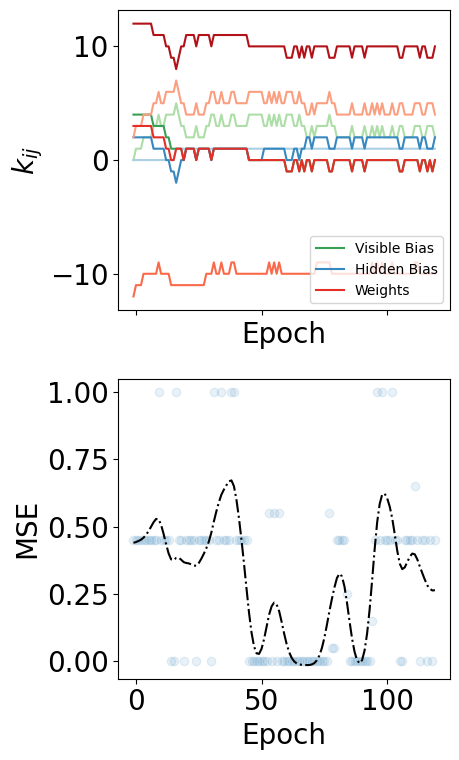

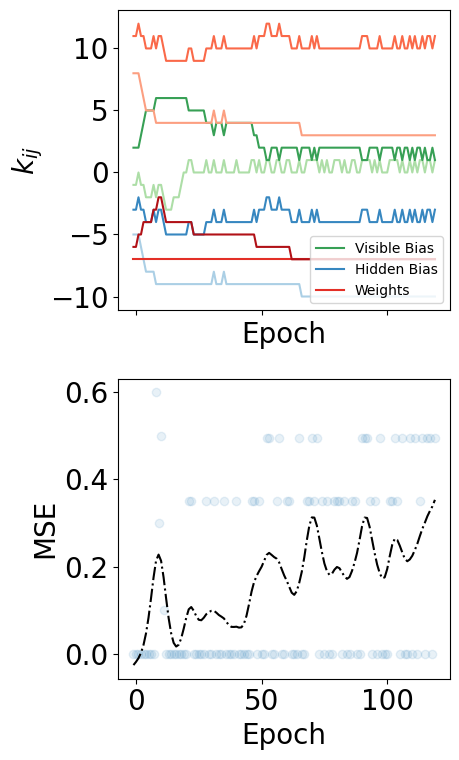

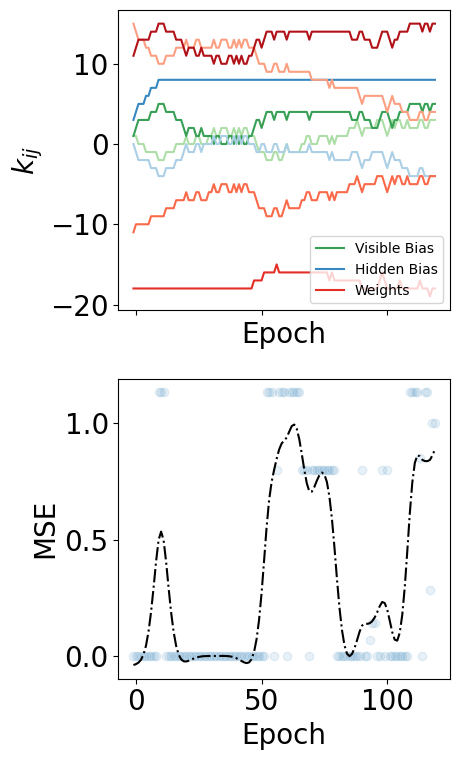

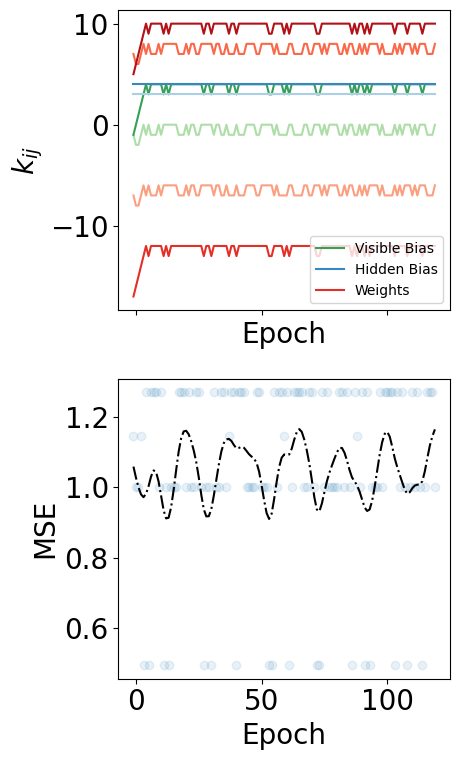

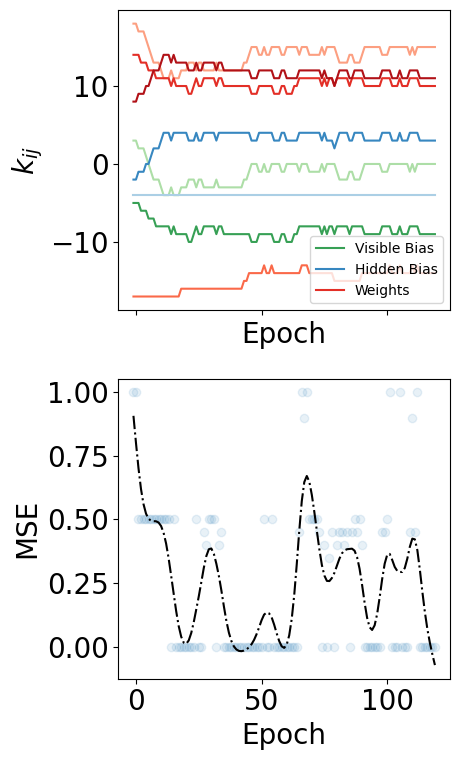

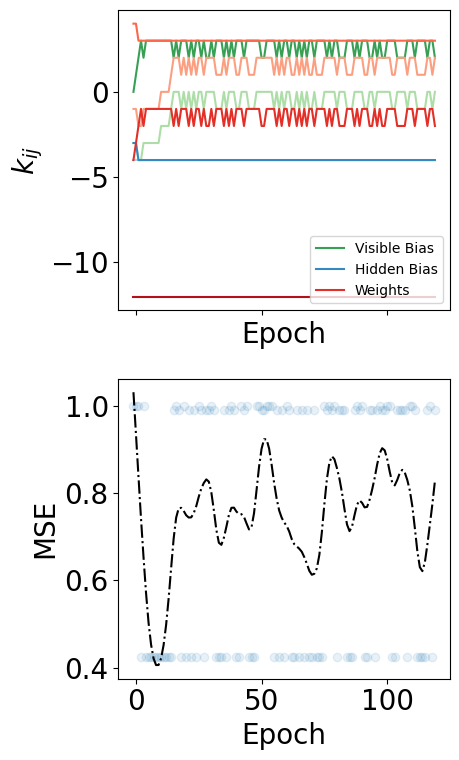

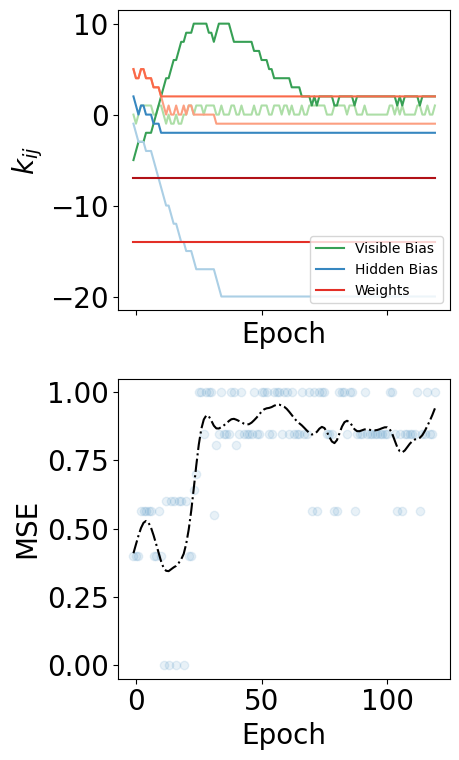

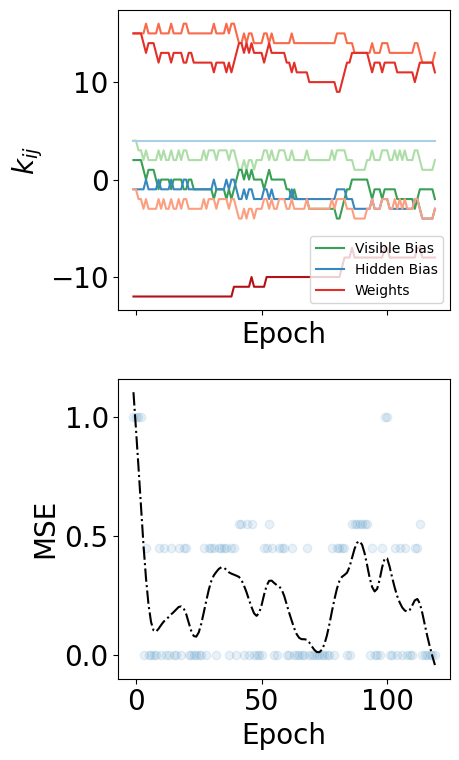

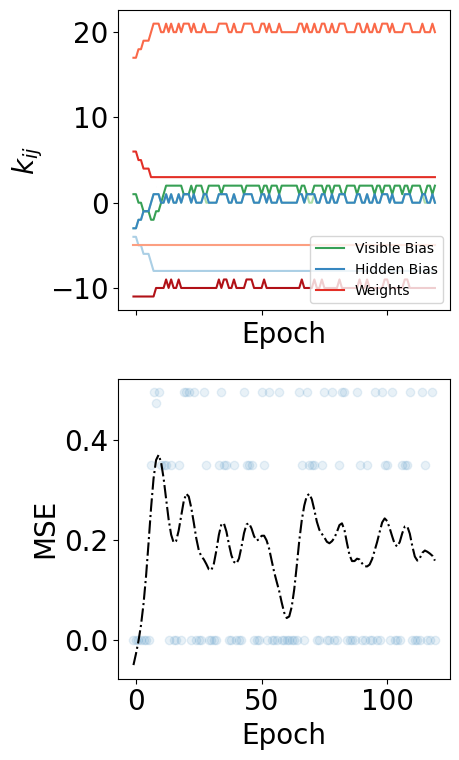

In [19]:
for i in range(10):
    df = pd.read_csv('data/trainings/test2x2_010726_new/train0{}.csv'.format(i))
    setup(df)
    df['DA0'] = 1.
    df['RA0'] = 1.
    print(i)
    
#     plt.plot(df.trainingstep, df.MSE)
#     plt.show()

    plot_training(df)
    

#     for e in range(8):
#         edge = edgekeys[e]
#         nA = Anodekeys[e]
#         nB = Bnodekeys[e]
        
#         deltak = df['D' + nA]*df['D' + nB] - df['R' + nA]*df['R' + nB]
#         realdeltak = np.array(df[edge])[1:] - np.array(df[edge][:-1])
# #         print('dK', edge, np.array(deltak))
# #         print('rdK', edge, realdeltak)
# #         bopp()
        
# #         plt.plot(deltak[1:] - realdeltak, label=edge)
# #         df['delta' + edge] = deltak
# #         df['realdelta' + edge] = realdeltak
#     plt.scatter(df.trainingstep, deltak, label=edge)
# #     plt.legend()
#     plt.show()

In [12]:
df['DV1']

0      NaN
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
116    0.0
117    1.0
118    1.0
119    0.0
120    1.0
Name: DV1, Length: 121, dtype: float64

0 0
0 1
1 0
1 1
['BV0', 'BV1', 'BH0', 'BH1', 'W00', 'W01', 'W10', 'W11']
[0, 0, 0, 0, 1, 1, 1, 1]
['A0', 'A0', 'A0', 'A0', 'V0', 'V0', 'V1', 'V1']
['V0', 'V1', 'H0', 'H1', 'H0', 'H1', 'H0', 'H1']
['A0' 'H0' 'H1' 'V0' 'V1']


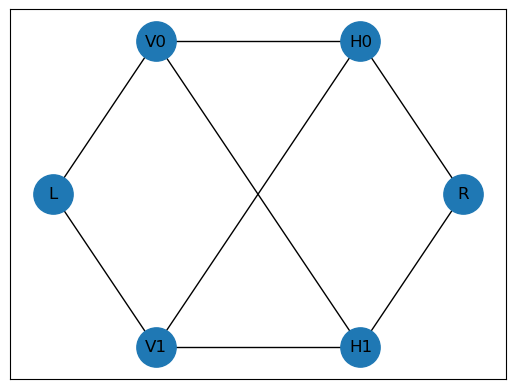

In [19]:
numV = 2
numH = 2

net = RKMNetwork([numV,numH])

net.draw_network()

edgekeys = []
isweight = []
Anodekeys = []
Bnodekeys = []

for edge in net.graph.edges:
    a, b = edge
    if (a=='L') or (a=='R'):
        edgekeys.append('B'+b)
        isweight.append(0)
        Anodekeys.append('A0')
        Bnodekeys.append(b)
    else:
        vi = a.split('V')[1]
        hi = b.split('H')[1]
        edgekeys.append('W'+vi+hi)
        isweight.append(1)
        Anodekeys.append(a)
        Bnodekeys.append(b)
        
nodekeys = np.unique([Anodekeys, Bnodekeys])
        
print(edgekeys)
print(isweight)
print(Anodekeys)
print(Bnodekeys)
print(nodekeys)

# add these to Network as edge attributes

In [44]:
df = pd.read_csv('data/trainings/test2x2_011326_analogtests/train00.csv')
setup(df)
df

,Unnamed: 0,Vtest,Vrecon,BV0,BV1,BH0,BH1,W00,W01,W10,...,RA0,RV0,RV1,RH0,RH1,aV0,aV1,aH0,aH1,MSE
0,0,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...",-2,-5,-5,-1,-9,-7,-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
1,1,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...",-1,-4,-5,-1,-9,-7,-10,...,1.0,0.0,0.0,0.0,0.0,1.986125,1.978066,1.977744,1.986769,1.000000
2,2,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...",-1,-3,-5,-1,-9,-7,-10,...,1.0,0.0,0.0,0.0,0.0,1.985802,1.978227,1.976454,1.988542,1.000000
3,3,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...",0,-2,-5,-1,-9,-7,-10,...,1.0,0.0,0.0,0.0,0.0,1.985641,1.978872,1.978066,1.986286,1.000000
4,4,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0...",1,-2,-5,-1,-9,-7,-10,...,1.0,0.0,0.0,0.0,0.0,1.986608,1.980484,1.975810,1.985802,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0...",1,1,-5,-1,-9,-7,-10,...,1.0,1.0,1.0,0.0,0.0,1.965978,1.965817,1.977905,1.985480,0.707107
57,57,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1...",0,2,-5,-1,-9,-7,-10,...,1.0,1.0,0.0,0.0,0.0,1.975326,1.968234,1.978711,1.984996,0.707107
58,58,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1...",0,2,-5,-1,-9,-7,-10,...,1.0,0.0,1.0,0.0,0.0,1.979839,1.978227,1.976615,1.985963,0.707107
59,59,"[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1...","[[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1...",1,2,-5,-1,-9,-7,-10,...,1.0,0.0,1.0,0.0,0.0,1.977744,1.979194,1.976615,1.985802,1.000000


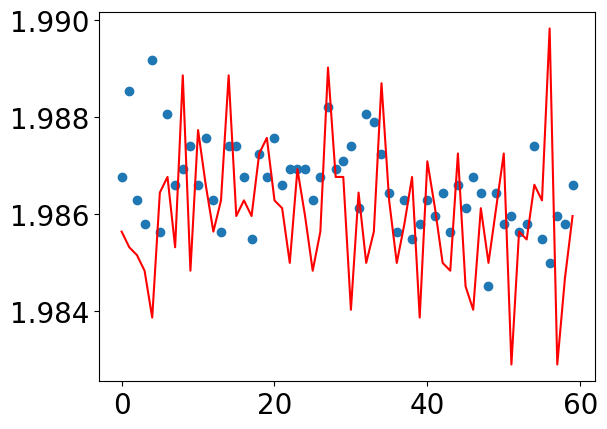

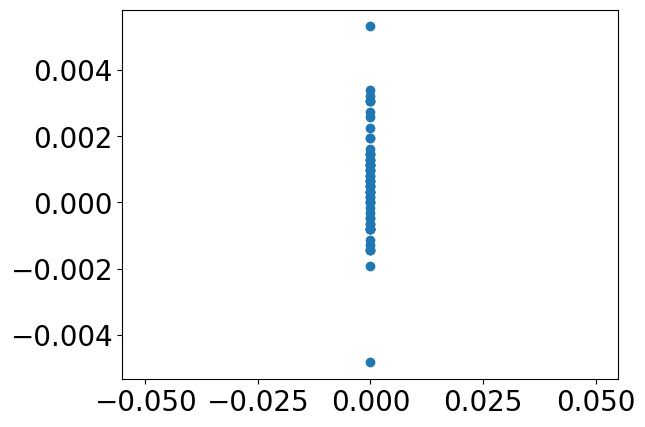

In [49]:
plt.scatter(df.trainingstep, df.aH1)
plt.plot(df.trainingstep, df.analogZero, c='r')

plt.show()

plt.scatter(df.RH1, df.aH1 - df.analogZero)
# plt.scatter(df.trainingstep, df.RV0)
# plt.xlim(0, 10)

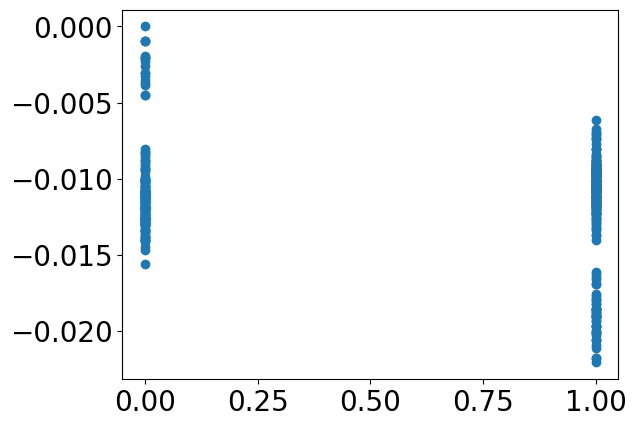

In [35]:
# plt.scatter(df.RV0, df.aV0 - df.analogZero)

plt.scatter(df.RV1, df.aV1 - df.analogZero)

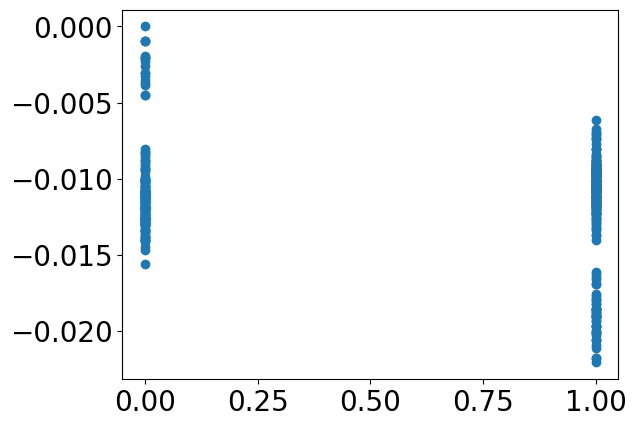

In [43]:
plt.scatter(df.RV1, df.aV1 - df.analogZero)

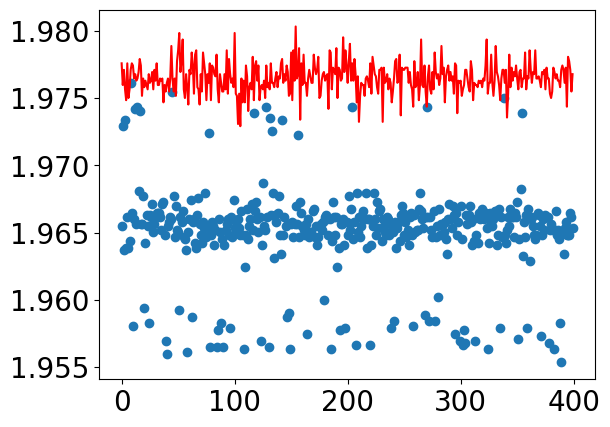

In [42]:
plt.scatter(df.trainingstep, df.aV1)
plt.plot(df.trainingstep, df.analogZero, c='r')